VAR(2) Analysis: UK-CA-US Quarterly GDP Growth Rates

Fetching data from FRED...
✓ Data downloaded successfully

Dataset: 162 quarterly observations
Period: 1980-04-01 to 2020-07-01

VAR(2) Model Estimation
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Feb, 2026
Time:                     09:05:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.154617
Nobs:                     160.000    HQIC:                 -0.394339
Log likelihood:          -615.432    FPE:                   0.572315
AIC:                    -0.558233    Det(Omega_mle):        0.503322
--------------------------------------------------------------------
Results for equation uk
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.341858         0.2

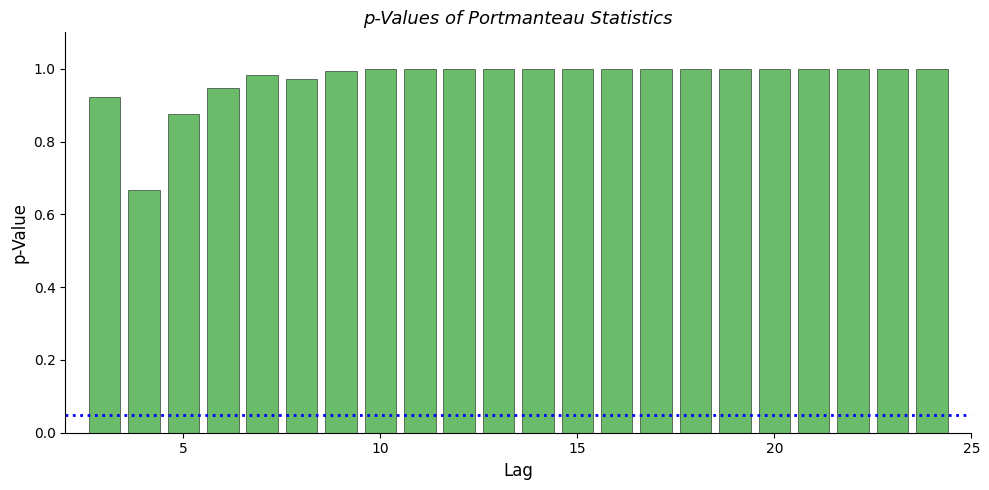


   Lag       Q-stat       df      p-value          Result
-------------------------------------------------------
     3         3.84        9       0.9216   ✓ White noise
     4        14.92       18       0.6674   ✓ White noise
     5        18.88       27       0.8743   ✓ White noise
     6        23.44       36       0.9471   ✓ White noise
     7        27.11       45       0.9840   ✓ White noise
     8        36.07       54       0.9712   ✓ White noise
     9        38.23       63       0.9942   ✓ White noise
    10        39.36       72       0.9994   ✓ White noise
    11        41.65       81       0.9999   ✓ White noise
    12        49.37       90       0.9998   ✓ White noise
    13        52.93       99       1.0000   ✓ White noise
    14        56.86      108       1.0000   ✓ White noise
    15        58.88      117       1.0000   ✓ White noise
    16        67.38      126       1.0000   ✓ White noise
    17        71.50      135       1.0000   ✓ White noise
    18        7

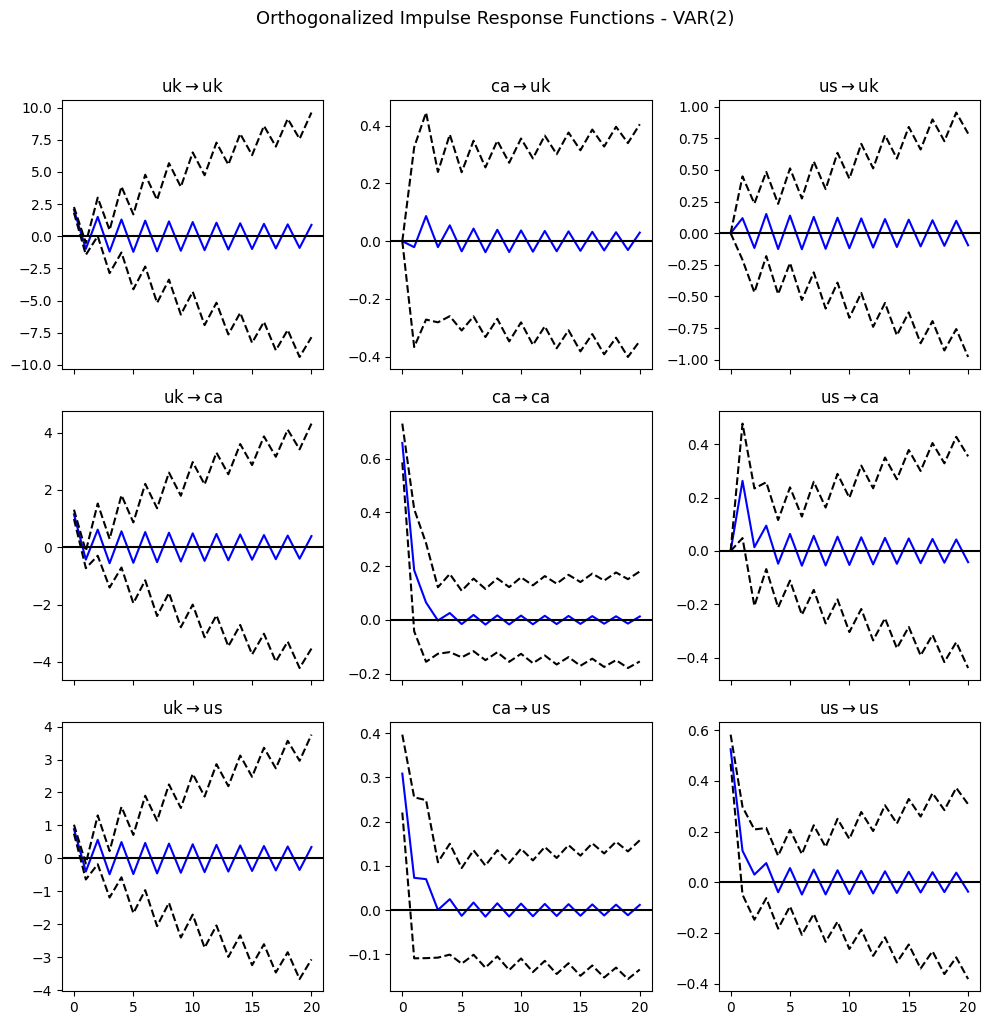

✓ IRF plot saved

Cumulative Impulse Response Functions


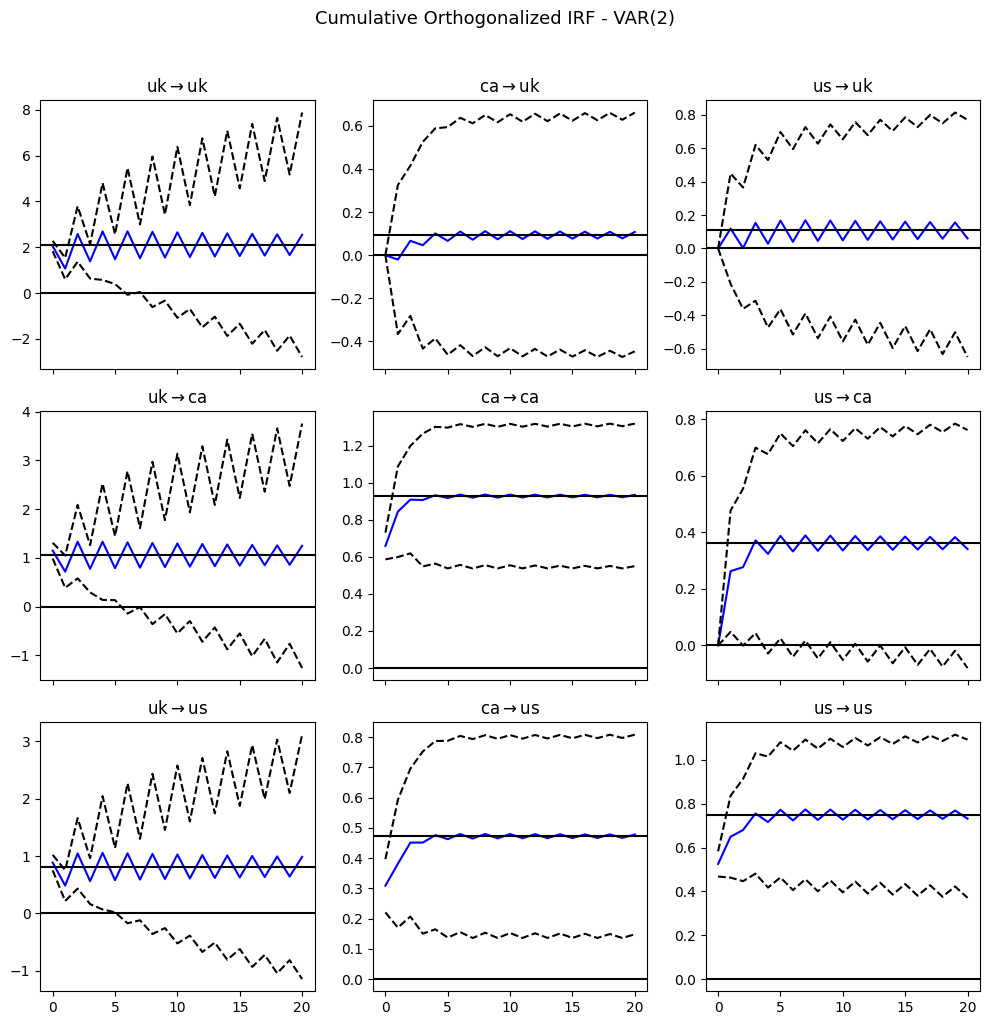

✓ Cumulative IRF plot saved

----------------------------------------------------------------------
Custom Cumulative IRF Plot
----------------------------------------------------------------------


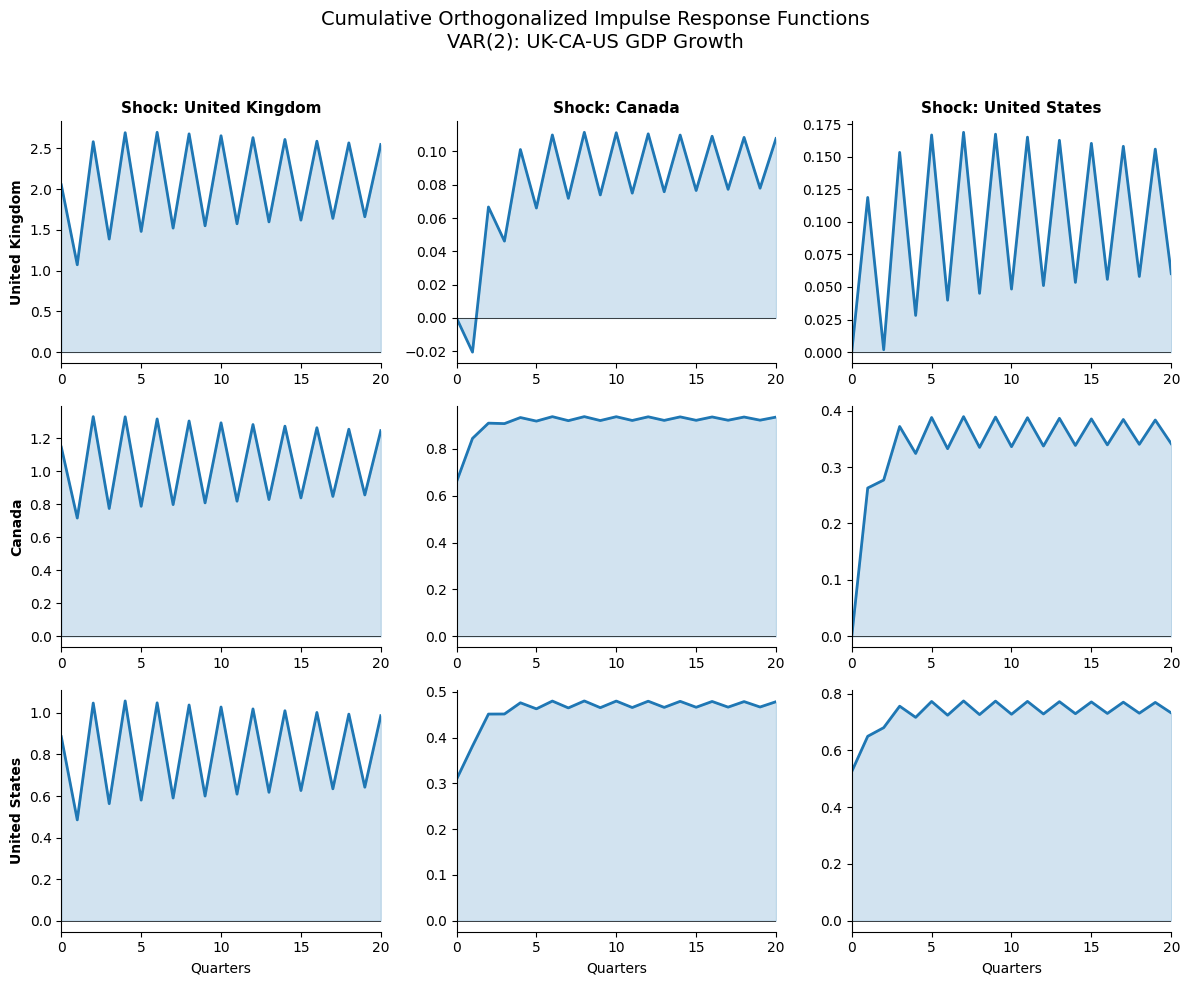

✓ Custom cumulative IRF plot saved

----------------------------------------------------------------------
Cumulative IRF with Bootstrap Confidence Bands
----------------------------------------------------------------------
Running 500 bootstrap replications...
  Bootstrap iteration 100/500
  Bootstrap iteration 200/500
  Bootstrap iteration 300/500
  Bootstrap iteration 400/500
  Bootstrap iteration 500/500
✓ Completed 500 successful bootstrap replications


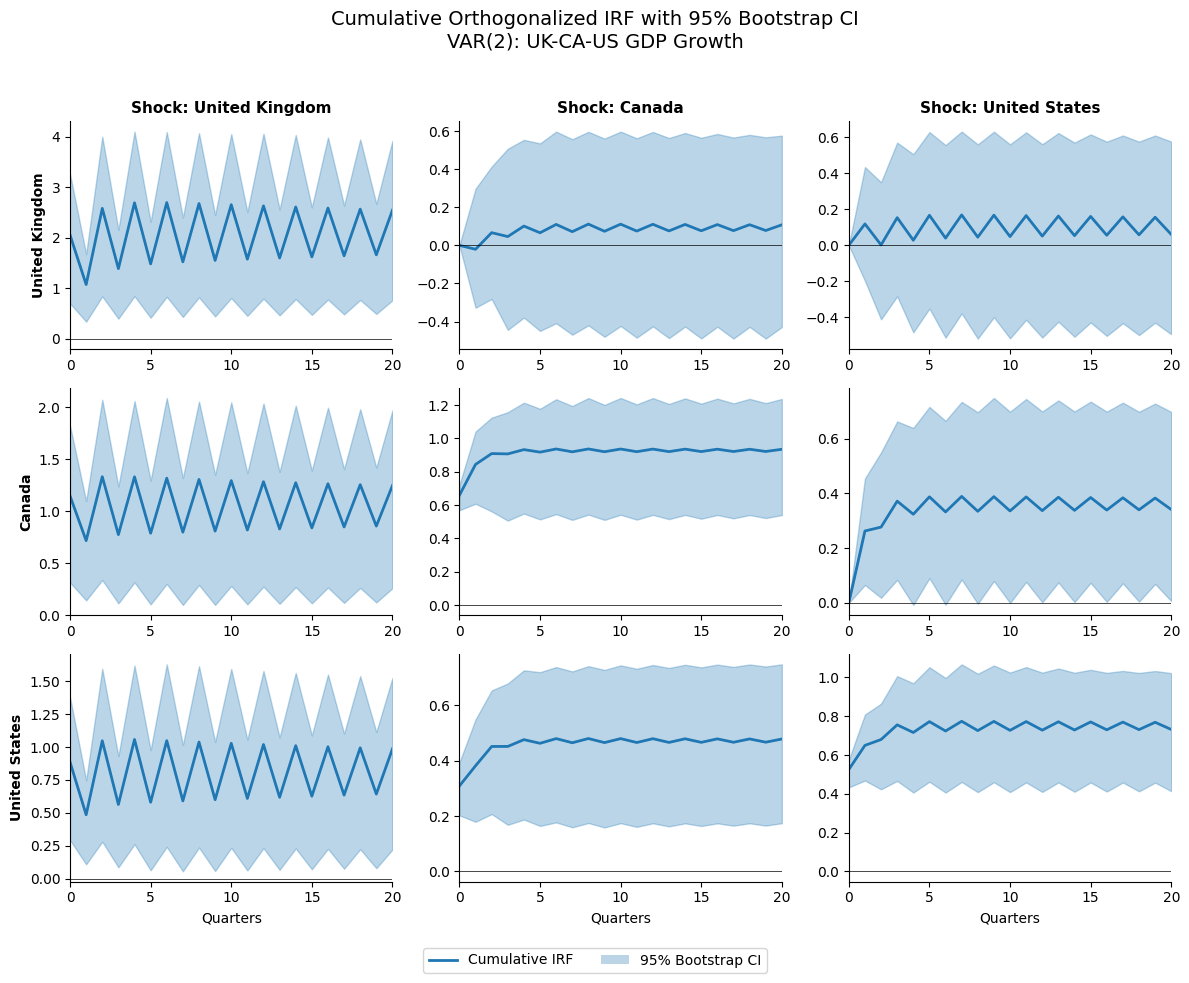

✓ Cumulative IRF with bootstrap CI saved

Forecast Error Variance Decomposition
FEVD for uk
            uk        ca        us
0     1.000000  0.000000  0.000000
1     0.997198  0.000081  0.002721
2     0.995217  0.001071  0.003713
3     0.993375  0.000944  0.005681
4     0.992690  0.001075  0.006235
5     0.991902  0.001045  0.007053
6     0.991468  0.001072  0.007460
7     0.991060  0.001068  0.007872
8     0.990769  0.001076  0.008156
9     0.990516  0.001078  0.008407
10    0.990313  0.001081  0.008606
11    0.990140  0.001083  0.008777
12    0.989993  0.001085  0.008922
13    0.989866  0.001086  0.009047
14    0.989756  0.001088  0.009156
15    0.989659  0.001089  0.009252
16    0.989574  0.001090  0.009336
17    0.989498  0.001091  0.009411
18    0.989430  0.001092  0.009478
19    0.989368  0.001093  0.009539

FEVD for ca
            uk        ca        us
0     0.752295  0.247705  0.000000
1     0.736645  0.229480  0.033875
2     0.776408  0.194984  0.028608
3     0.799168  0.17

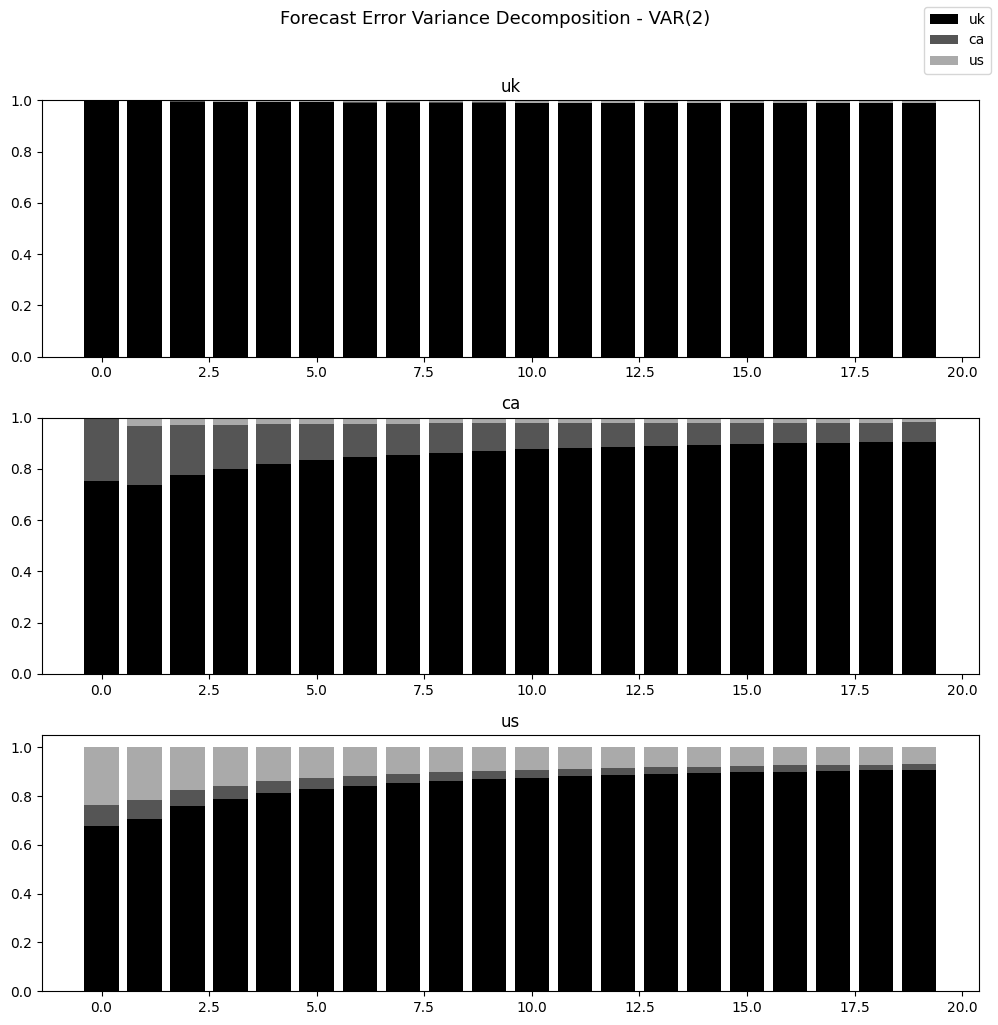

✓ FEVD plot saved

SUMMARY

Data: UK, Canada, US quarterly GDP growth rates
Period: 1980-04-01 to 2020-07-01 (162 obs)

VAR(2) Diagnostics:
  - Portmanteau Q test: All p > 0.05 ✓

IRF Analysis:
  - Standard IRF: Immediate and propagation effects
  - Cumulative IRF: Long-run total effects
  - Bootstrap CI: 95% confidence bands (500 replications)

Analysis Complete!


In [5]:
! pip install PythonTSA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import pandas_datareader.data as web
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# Download UK-CA-US GDP Data from FRED
# =============================================================================
print("=" * 70)
print("VAR(2) Analysis: UK-CA-US Quarterly GDP Growth Rates")
print("=" * 70)

start_date = '1980-01-01'
end_date = '2024-12-31'

print("\nFetching data from FRED...")

us_gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
uk_gdp = web.DataReader('CLVMNACSCAB1GQUK', 'fred', start_date, end_date)
ca_gdp = web.DataReader('NGDPRSAXDCCAQ', 'fred', start_date, end_date)

print("✓ Data downloaded successfully")

us_growth = np.log(us_gdp).diff().dropna() * 100
uk_growth = np.log(uk_gdp).diff().dropna() * 100
ca_growth = np.log(ca_gdp).diff().dropna() * 100

uk_growth.columns = ['uk']
ca_growth.columns = ['ca']
us_growth.columns = ['us']

ukcaus = pd.concat([uk_growth, ca_growth, us_growth], axis=1).dropna()
ukcaus.index = pd.DatetimeIndex(ukcaus.index)

print(f"\nDataset: {len(ukcaus)} quarterly observations")
print(f"Period: {ukcaus.index[0].strftime('%Y-%m-%d')} to {ukcaus.index[-1].strftime('%Y-%m-%d')}")

# =============================================================================
# Fit VAR(2) Model
# =============================================================================
print("\n" + "=" * 70)
print("VAR(2) Model Estimation")
print("=" * 70)

model = VAR(ukcaus)
var_result = model.fit(maxlags=2, ic=None)
print(var_result.summary())

residuals = var_result.resid

# =============================================================================
# Multivariate Portmanteau Q Test
# =============================================================================
print("\n" + "=" * 70)
print("Multivariate Portmanteau Q Test")
print("=" * 70)

def multivariate_portmanteau(residuals, lags, p):
    """Compute multivariate Portmanteau Q statistic"""
    if isinstance(residuals, pd.DataFrame):
        residuals = residuals.values

    T, k = residuals.shape
    Sigma = residuals.T @ residuals / T
    Sigma_inv = np.linalg.inv(Sigma)

    Q = 0
    for h in range(1, lags + 1):
        C_h = residuals[h:].T @ residuals[:-h] / T
        Q += T * np.trace(C_h.T @ Sigma_inv @ C_h @ Sigma_inv)

    df = k * k * (lags - p)
    df = max(df, 1)
    p_value = 1 - stats.chi2.cdf(Q, df)

    return Q, p_value, df

max_lag = 24
p_order = 2

lags_to_test = range(p_order + 1, max_lag + 1)
q_stats = []
p_values = []

for lag in lags_to_test:
    Q, p, df = multivariate_portmanteau(residuals, lag, p_order)
    q_stats.append(Q)
    p_values.append(p)

# Plot Portmanteau p-values
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.bar(list(lags_to_test), p_values, color='#2ca02c', alpha=0.7, edgecolor='black', linewidth=0.5)
ax.axhline(y=0.05, color='blue', linestyle=':', linewidth=2, label='5% significance')
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('p-Value', fontsize=12)
ax.set_title('p-Values of Portmanteau Statistics', fontsize=13, style='italic')
ax.set_xlim(p_order, max_lag + 1)
ax.set_ylim(0, max(1, max(p_values) * 1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('portmanteau_pvalues_ukcaus.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print(f"\n{'Lag':>6} {'Q-stat':>12} {'df':>8} {'p-value':>12} {'Result':>15}")
print("-" * 55)

for lag, Q, p in zip(lags_to_test, q_stats, p_values):
    result = '✓ White noise' if p > 0.05 else '✗ Autocorr.'
    df = 9 * (lag - p_order)
    print(f"{lag:>6} {Q:>12.2f} {df:>8} {p:>12.4f} {result:>15}")

all_pass = all(p > 0.05 for p in p_values)
print("-" * 55)
print(f"{'✓ All p-values > 0.05 — VAR(2) is ADEQUATE' if all_pass else '⚠ Some p-values < 0.05'}")

# =============================================================================
# Impulse Response Functions
# =============================================================================
print("\n" + "=" * 70)
print("Impulse Response Functions")
print("=" * 70)

periods = 20
irf = var_result.irf(periods=periods)

# Standard IRF Plot
fig = irf.plot(orth=True)
fig.suptitle('Orthogonalized Impulse Response Functions - VAR(2)', fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig('irf_ukcaus.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("✓ IRF plot saved")

# =============================================================================
# Cumulative IRF Plot (Built-in)
# =============================================================================
print("\n" + "=" * 70)
print("Cumulative Impulse Response Functions")
print("=" * 70)

fig = irf.plot_cum_effects(orth=True)
fig.suptitle('Cumulative Orthogonalized IRF - VAR(2)', fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig('irf_cumulative_ukcaus.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("✓ Cumulative IRF plot saved")

# =============================================================================
# Custom Cumulative IRF Plot (Higher Quality)
# =============================================================================
print("\n" + "-" * 70)
print("Custom Cumulative IRF Plot")
print("-" * 70)

irf_data = irf.orth_irfs  # Shape: (periods+1, n, n)
cum_irf = np.cumsum(irf_data, axis=0)

var_names = ['uk', 'ca', 'us']
var_labels = ['United Kingdom', 'Canada', 'United States']
n = len(var_names)

fig, axes = plt.subplots(n, n, figsize=(12, 10))
fig.patch.set_alpha(0)
fig.suptitle('Cumulative Orthogonalized Impulse Response Functions\nVAR(2): UK-CA-US GDP Growth',
             fontsize=14, y=0.98)

horizons = np.arange(periods + 1)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        ax.patch.set_alpha(0)

        ax.plot(horizons, cum_irf[:, i, j], color='#1f77b4', linewidth=2)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax.fill_between(horizons, 0, cum_irf[:, i, j], alpha=0.2, color='#1f77b4')

        if i == 0:
            ax.set_title(f'Shock: {var_labels[j]}', fontsize=11, fontweight='bold')
        if j == 0:
            ax.set_ylabel(f'{var_labels[i]}', fontsize=10, fontweight='bold')
        if i == n - 1:
            ax.set_xlabel('Quarters', fontsize=10)

        ax.set_xlim(0, periods)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('irf_cumulative_custom_ukcaus.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print("✓ Custom cumulative IRF plot saved")

# =============================================================================
# Cumulative IRF with Bootstrap Confidence Bands
# =============================================================================
print("\n" + "-" * 70)
print("Cumulative IRF with Bootstrap Confidence Bands")
print("-" * 70)

n_boot = 500
boot_cum_irfs = []

print(f"Running {n_boot} bootstrap replications...")

np.random.seed(42)

# Get fitted values and residuals
fitted = var_result.fittedvalues.values
resid = var_result.resid.values
T_resid = len(resid)

# Get coefficient matrices
coefs = var_result.coefs  # Shape: (p, k, k)
intercept = var_result.intercept  # Shape: (k,)

for b in range(n_boot):
    if (b + 1) % 100 == 0:
        print(f"  Bootstrap iteration {b + 1}/{n_boot}")

    try:
        # Resample residuals with replacement
        idx = np.random.choice(T_resid, size=T_resid, replace=True)
        resid_boot = resid[idx]

        # Reconstruct bootstrapped series
        Y_boot = np.zeros((T_resid + 2, n))
        Y_boot[:2] = ukcaus.values[:2]  # Initial values

        for t in range(2, T_resid + 2):
            Y_boot[t] = intercept + coefs[0] @ Y_boot[t-1] + coefs[1] @ Y_boot[t-2] + resid_boot[t-2]

        # Create DataFrame
        boot_data = pd.DataFrame(Y_boot[2:], columns=var_names)

        # Fit VAR on bootstrapped data
        model_boot = VAR(boot_data)
        result_boot = model_boot.fit(maxlags=2, ic=None)
        irf_boot = result_boot.irf(periods=periods)

        # Compute cumulative IRF
        cum_irf_boot = np.cumsum(irf_boot.orth_irfs, axis=0)
        boot_cum_irfs.append(cum_irf_boot)

    except Exception as e:
        continue

boot_cum_irfs = np.array(boot_cum_irfs)
print(f"✓ Completed {len(boot_cum_irfs)} successful bootstrap replications")

# Compute confidence intervals
ci_lower = np.percentile(boot_cum_irfs, 2.5, axis=0)
ci_upper = np.percentile(boot_cum_irfs, 97.5, axis=0)

# Plot with confidence bands
fig, axes = plt.subplots(n, n, figsize=(12, 10))
fig.patch.set_alpha(0)
fig.suptitle('Cumulative Orthogonalized IRF with 95% Bootstrap CI\nVAR(2): UK-CA-US GDP Growth',
             fontsize=14, y=0.98)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        ax.patch.set_alpha(0)

        ax.fill_between(horizons, ci_lower[:, i, j], ci_upper[:, i, j],
                        alpha=0.3, color='#1f77b4', label='95% CI')
        ax.plot(horizons, cum_irf[:, i, j], color='#1f77b4', linewidth=2, label='IRF')
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

        if i == 0:
            ax.set_title(f'Shock: {var_labels[j]}', fontsize=11, fontweight='bold')
        if j == 0:
            ax.set_ylabel(f'{var_labels[i]}', fontsize=10, fontweight='bold')
        if i == n - 1:
            ax.set_xlabel('Quarters', fontsize=10)

        ax.set_xlim(0, periods)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

handles = [plt.Line2D([0], [0], color='#1f77b4', linewidth=2),
           plt.Rectangle((0,0), 1, 1, fc='#1f77b4', alpha=0.3)]
labels = ['Cumulative IRF', '95% Bootstrap CI']
fig.legend(handles, labels, loc='lower center', ncol=2,
           bbox_to_anchor=(0.5, 0.01), fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.savefig('irf_cumulative_bootstrap_ukcaus.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print("✓ Cumulative IRF with bootstrap CI saved")

# =============================================================================
# FEVD
# =============================================================================
print("\n" + "=" * 70)
print("Forecast Error Variance Decomposition")
print("=" * 70)

fevd = var_result.fevd(20)
print(fevd.summary())

fig = fevd.plot()
fig.suptitle('Forecast Error Variance Decomposition - VAR(2)', fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig('fevd_ukcaus.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("✓ FEVD plot saved")

# =============================================================================
# Summary
# =============================================================================
print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)

print(f"""
Data: UK, Canada, US quarterly GDP growth rates
Period: {ukcaus.index[0].strftime('%Y-%m-%d')} to {ukcaus.index[-1].strftime('%Y-%m-%d')} ({len(ukcaus)} obs)

VAR(2) Diagnostics:
  - Portmanteau Q test: {'All p > 0.05 ✓' if all_pass else 'Some p < 0.05 ⚠'}

IRF Analysis:
  - Standard IRF: Immediate and propagation effects
  - Cumulative IRF: Long-run total effects
  - Bootstrap CI: 95% confidence bands ({len(boot_cum_irfs)} replications)
""")

print("=" * 70)
print("Analysis Complete!")
print("=" * 70)